# Qiskit Hands-on Session. Part 1: A Hello World turned into Deep Dive

**Sim-MBQP 2025**

**Elena Peña Tapia, IBM Quantum**

This notebook is a self-contained in-depth introduction to Qiskit. If you have never used Qiskit, this should provide you the tools necessary to tackle the exercises in Part 2. If you have already used Qiskit, you should hopefully be able to learn how to better leverage the tools offered in the library.

In [24]:
# uncomment to install packages

# ! pip install -U qiskit
# ! pip install -U qiskit_ibm_runtime
# ! pip install graphviz
# ! pip install seaborn
# ! pip install pylatexenc

This notebook has been last run with the following package versions (versions are important! always keep track of what versions are installed in your environment and try to update to the latest patch version to keep bugs away):

In [25]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version

print("Qiskit version: ", qiskit_version)
print("Qiskit Runtime version: ", runtime_version)

Qiskit version:  2.0.2
Qiskit Runtime version:  0.40.0




## Starting with the basics... What is Qiskit?

### The Qiskit Stack

* Qiskit SDK: open-source tools for building and manipulating quantum circuits and operators, and, in general abstractions for interacting with quantum computers

* Qiskit Runtime client: a service provider for IBM Quantum Hardware following the abstraction model proposed in the Qiskit SDK. The code in the client is open-source.

* IBM Quantum Platform: [link to IQP](https://quantum.cloud.ibm.com)

<img src="images/qiskit_stack_2.png" alt="Drawing" style="width: 800px;"/>


## Representing a Quantum Computer

This isn't the usual starting point of a Qiskit tutorial, in fact, many Qiskit users overlook this aspect of the SDK. But on top of tools for building and manipulating circuits and quantum info operators, Qiskit provides an abstraction for the physical quantum computer that is the cornerstone of the stack. This abstraction is realized by the `Backend` class, which sets a clear interface to model interactions with real quantum computing hardware. 

<img src="images/target_model.png" alt="Drawing" style="width: 800px;"/>

This simple but efficient model allows to define different "families" of backends, that we currently expose through different packages:

### Real Backends

In real backends, the `Target` information is pulled from the real hardware properties at the time of query. IBM Quantum backends are accessible through the `QiskitRuntimeService`. To access the service, you must create an IQP account: https://quantum.cloud.ibm.com/signin.

In [26]:
from qiskit_ibm_runtime import QiskitRuntimeService
from my_info import API_KEY_A, CRN_A

service = QiskitRuntimeService(channel="ibm_quantum_platform", token=API_KEY_A, instance=CRN_A)
my_backends = service.backends(simulator=False)

print("MY AVAILABLE BACKENDS:\n")
for my_back in my_backends:
    print(my_back)

MY AVAILABLE BACKENDS:

<IBMBackend('ibm_brisbane')>
<IBMBackend('ibm_fez')>
<IBMBackend('ibm_sherbrooke')>
<IBMBackend('ibm_torino')>
<IBMBackend('ibm_marrakesh')>


You can retrieve a backend by name:

In [27]:
backend = service.backend("ibm_sherbrooke")

And access the qubit and gate properties stored in its target:

In [28]:
print("Backend Target: ", backend.target)

Backend Target:  Target
Number of qubits: 127
Instructions:
	sx
		(0,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000167341
		(1,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000430179
		(2,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000322299
		(3,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000228878
		(4,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000146489
		(5,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000364036
		(6,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000203222
		(7,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000781166
		(8,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000213417
		(9,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000355645
		(10,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000297596
		(11,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.00015433
		(12,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000188241
		(13,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000412807
		(14,):
			Duration: 5

However, I prefer visualizing the properties directly using the following visualization tools:

In [29]:
from qiskit.visualization import plot_gate_map, plot_error_map

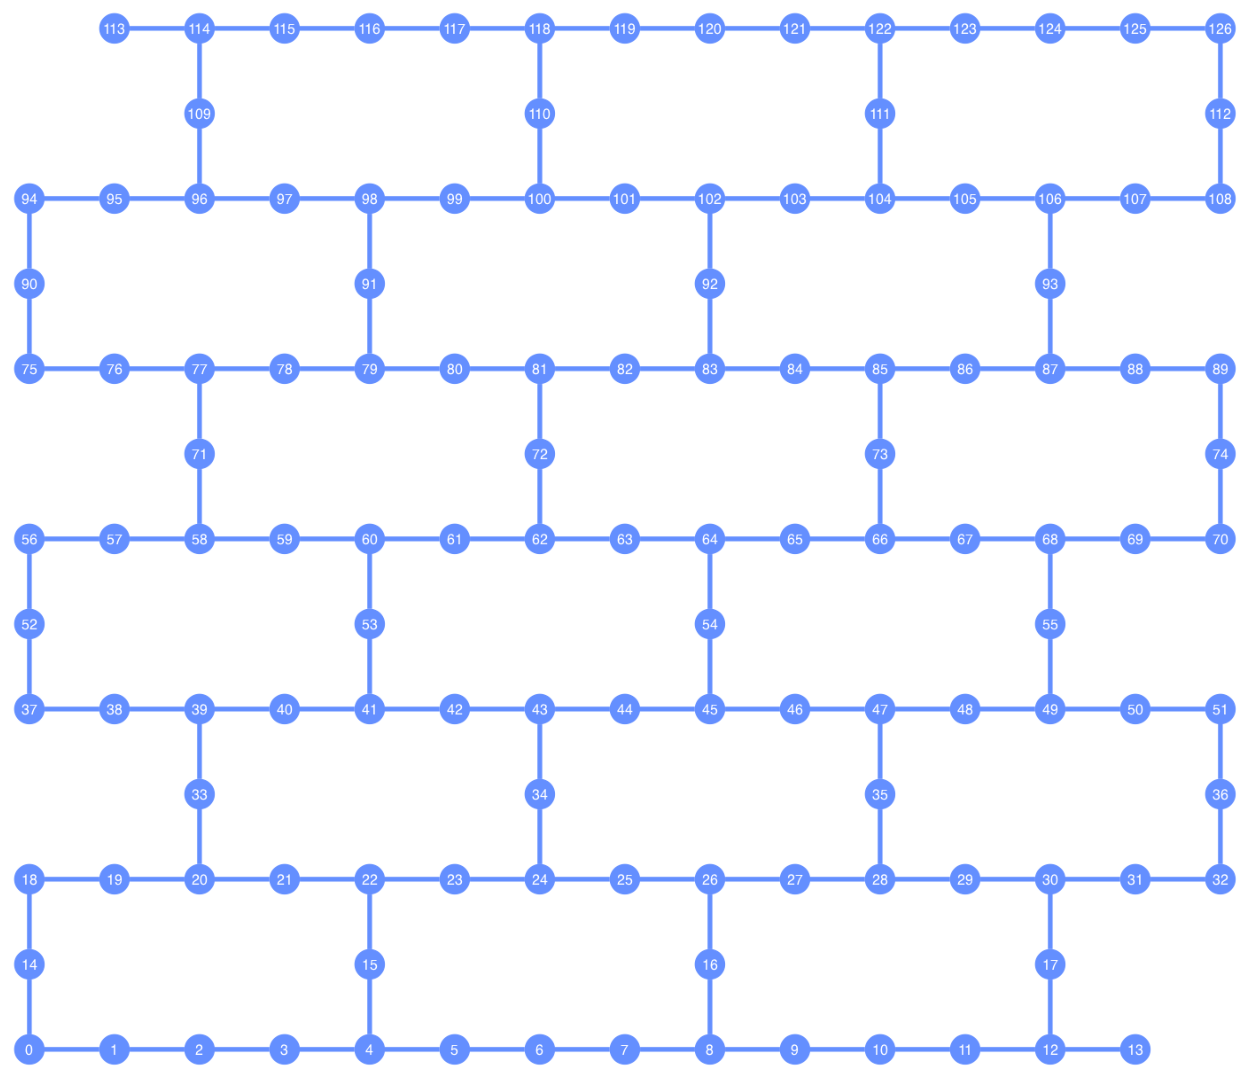

In [30]:
plot_gate_map(backend)

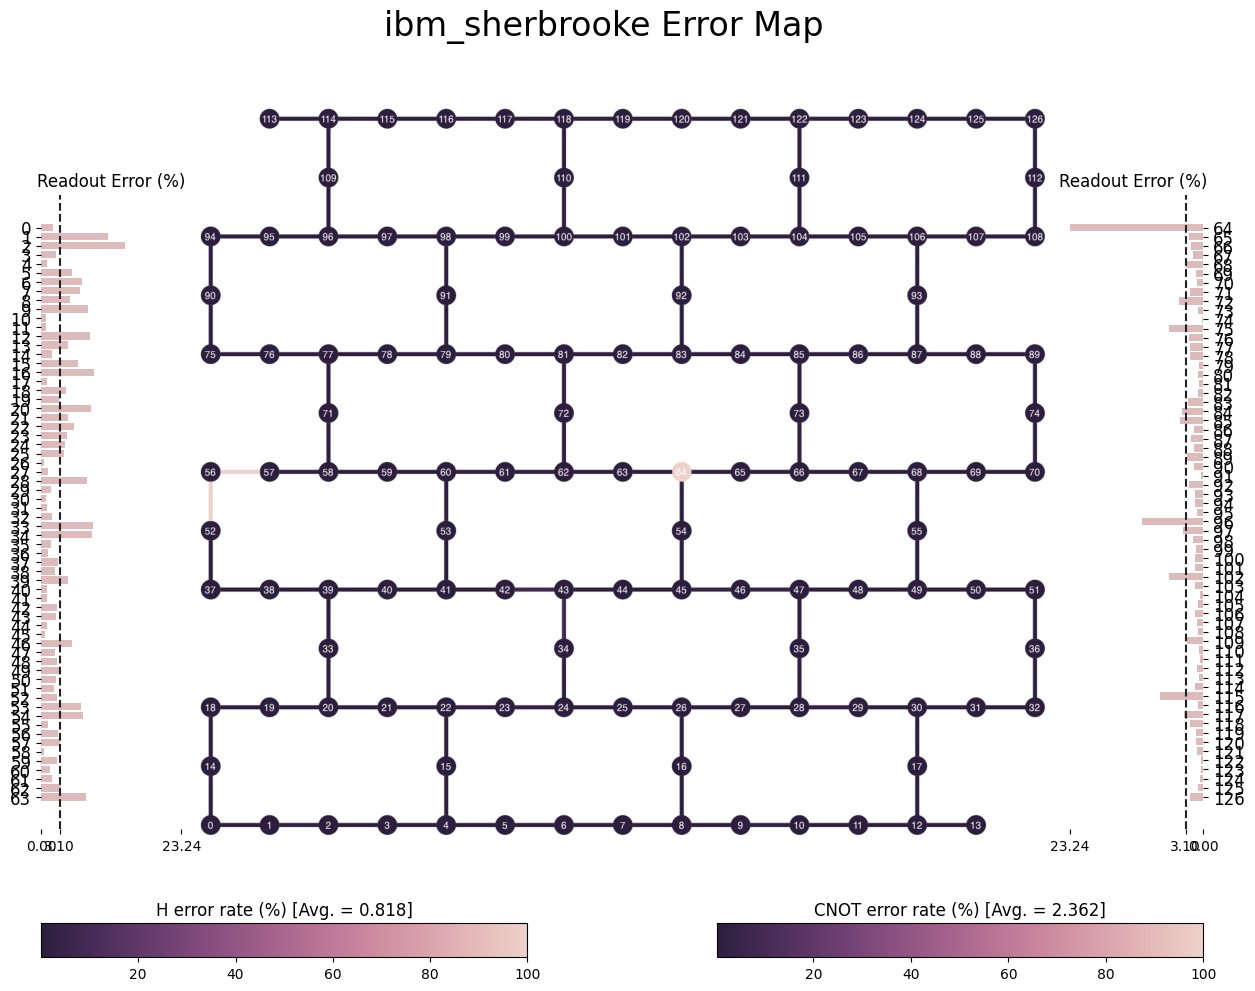

In [31]:
plot_error_map(backend)

### Fake Backends

The runtime client also provides "fake backends". These contain a `Target` with **snapshots** of real qubit and gate properties, and can run on a **local simulator** instead of a real device. Fake backends are useful for testing the pre-execution steps of the algorithm (especially circuit optimization/transpilation). The testing capacities for the execution are limited to a small number of qubits (~20), depending on the simulator used.

In [32]:
# ! pip install qiskit-aer

Note: Qiskit ships a default simulator, `BasicSimulator`, with limited capabilities. For an enhanced simulation experience, we recommend installing [Qiskit Aer](https://github.com/Qiskit/qiskit-aer). Fake backends will automatically use the `AerSimulator` if `qiskit-aer` is installed in the environment.



Let's play around with different fake backends. Modify the cells below to test different visualizations, look for new backends in the `qiskit_ibm_runtime.fake_provider` module.

In [33]:
from qiskit_ibm_runtime.fake_provider import FakeFez, FakeSherbrooke

# [UNCOMMENT TO TRY WITH plot_gate_map]
# backend = FakeFez()

# [UNCOMMENT TO TRY WITH plot_gate_map]
backend = FakeSherbrooke()

In [34]:
print("Backend Target: ", backend.target)

Backend Target:  Target
Number of qubits: 127
Instructions:
	sx
		(0,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000287751
		(1,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000201489
		(2,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000380275
		(3,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000577036
		(4,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000180188
		(5,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000868873
		(6,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000803732
		(7,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000377107
		(8,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000585087
		(9,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.00026195
		(10,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000270865
		(11,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000156604
		(12,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.000432284
		(13,):
			Duration: 5.68889e-08 sec.
			Error Rate: 0.00200975
		(14,):
			Duration: 5.

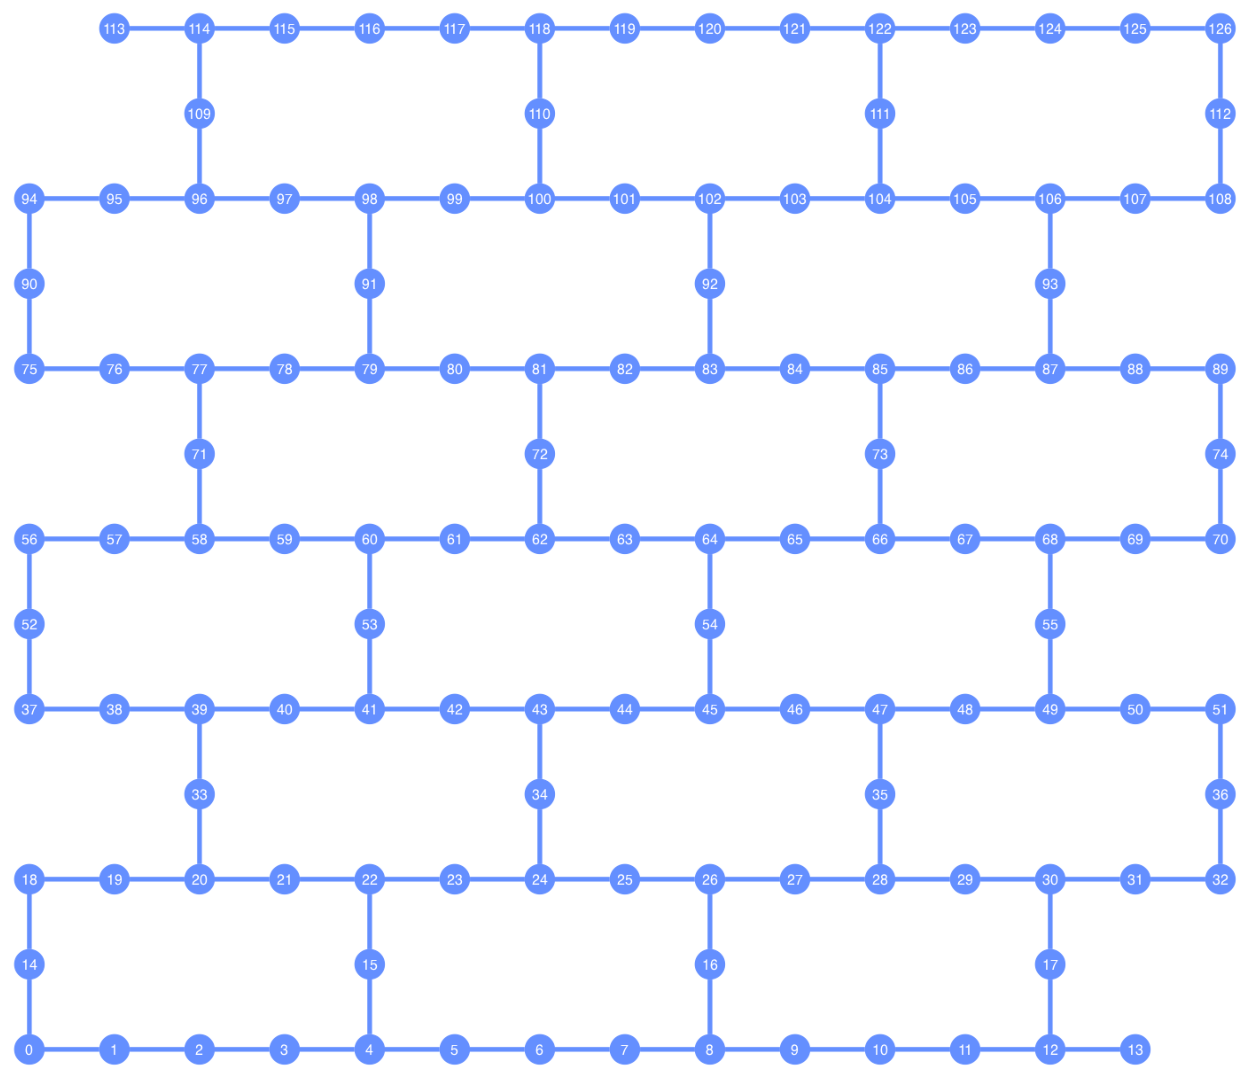

In [35]:
plot_gate_map(backend)

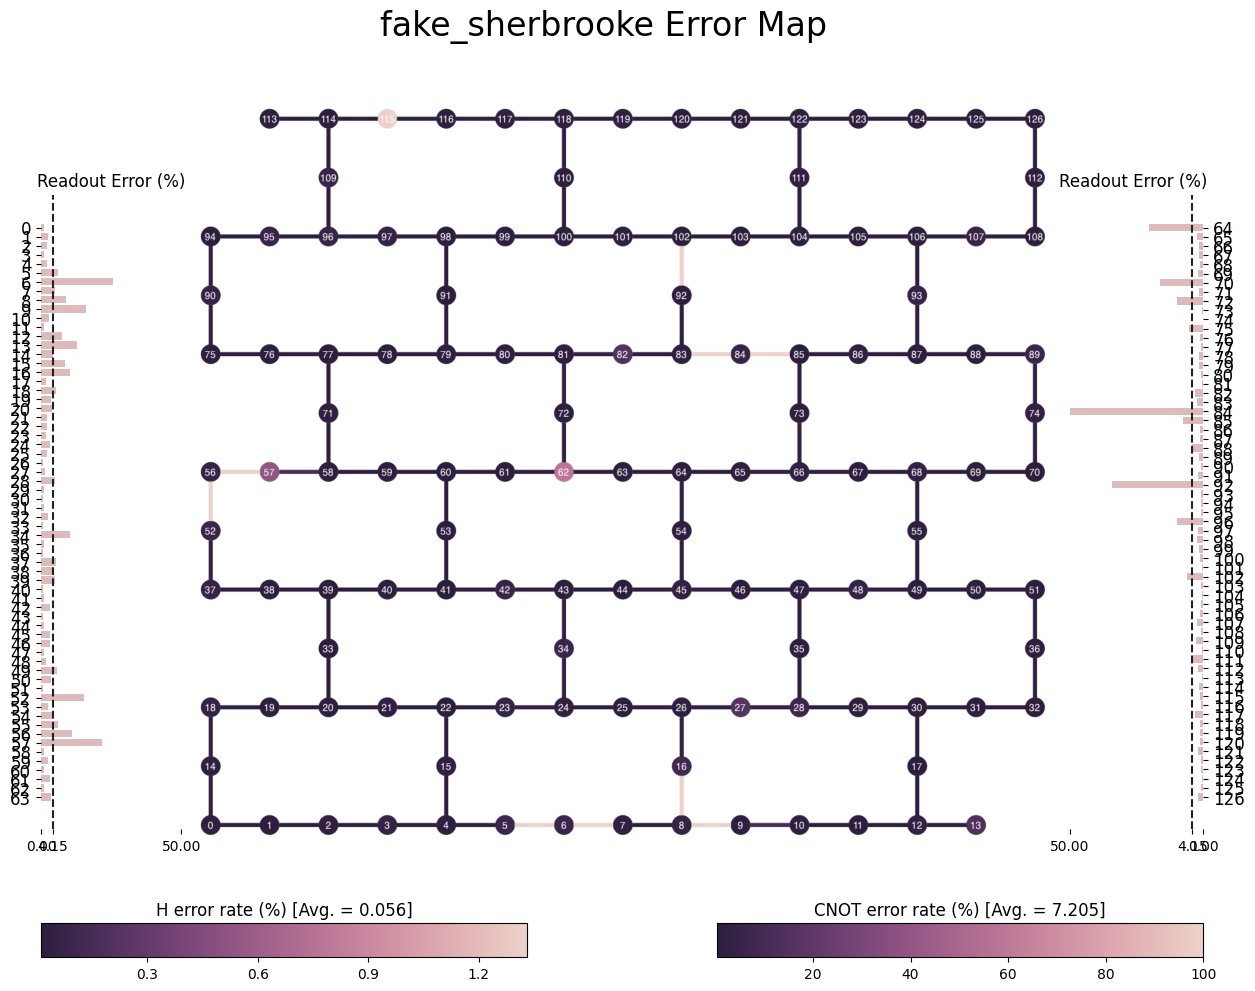

In [36]:
plot_error_map(backend)

### Fake Backends with Custom Target

On top of real and "snapshot-based" fake backends, one can also "design" their own backend. The `GenericBackendV2` class in Qiskit allows to create a custom fake backend where the target doesn't come from a real device snapshot, but can be generated in the spot.

In [37]:
from qiskit.providers.fake_provider import GenericBackendV2 

backend = GenericBackendV2(num_qubits=3, coupling_map=[[0,1], [1,2]], seed=42) 
print("Backend Target: ", backend.target)

Backend Target:  Target: Generic Target with 3 qubits
Number of qubits: 3
Instructions:
	cx
		(0, 1):
			Duration: 4.49328e-07 sec.
			Error Rate: 0.00186028
		(1, 2):
			Duration: 8.39826e-07 sec.
			Error Rate: 0.00322289
	id
		(0,):
			Duration: 5.4612e-08 sec.
			Error Rate: 9.44341e-05
		(1,):
			Duration: 3.6852e-08 sec.
			Error Rate: 9.55458e-05
		(2,):
			Duration: 3.1968e-08 sec.
			Error Rate: 9.82763e-05
	rz
		(0,):
			Duration: 0 sec.
			Error Rate: 0
		(1,):
			Duration: 0 sec.
			Error Rate: 0
		(2,):
			Duration: 0 sec.
			Error Rate: 0
	sx
		(0,):
			Duration: 4.884e-08 sec.
			Error Rate: 9.75809e-05
		(1,):
			Duration: 4.0626e-08 sec.
			Error Rate: 9.9707e-05
		(2,):
			Duration: 5.6832e-08 sec.
			Error Rate: 9.77838e-05
	x
		(0,):
			Duration: 3.5742e-08 sec.
			Error Rate: 9.46672e-05
		(1,):
			Duration: 3.1302e-08 sec.
			Error Rate: 9.15429e-05
		(2,):
			Duration: 5.0394e-08 sec.
			Error Rate: 9.74476e-05
	reset
		(0,):
		(1,):
		(2,):
	delay
		(0,):
		(1,)

The coupling map class allows to easily play around with different connectivity settings:

In [38]:
from qiskit.transpiler import CouplingMap

# [UNCOMMENT TO TRY WITH plot_gate_map]
# backend = GenericBackendV2(num_qubits=5, seed=42)

# [UNCOMMENT TO TRY WITH plot_gate_map]
cmap = CouplingMap.from_heavy_hex(5, bidirectional=False)
num_qubits = cmap.size()
backend = GenericBackendV2(num_qubits=num_qubits, coupling_map=cmap, seed=42) 

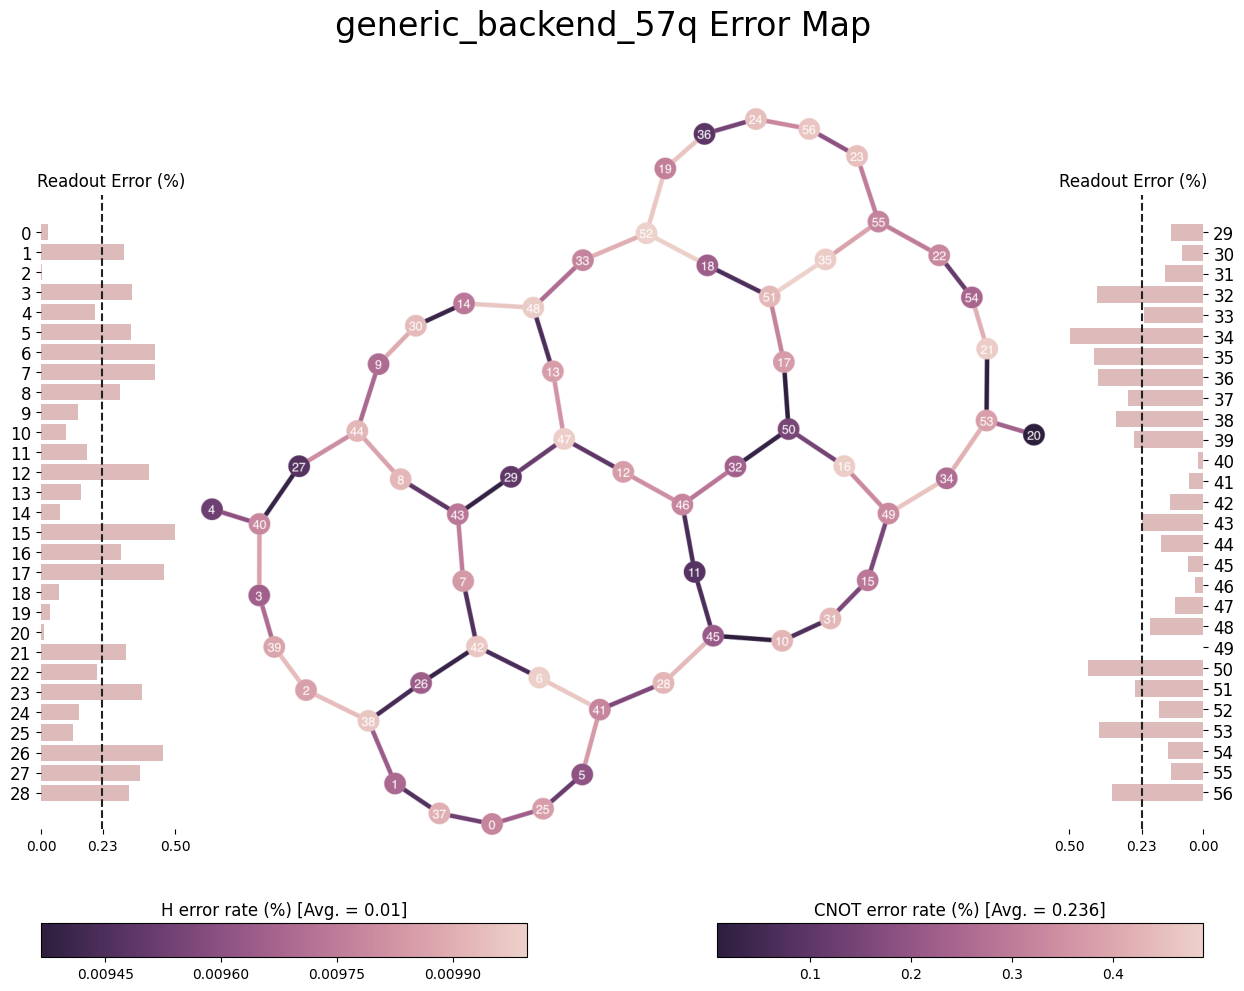

In [39]:
plot_error_map(backend)

## More basics: Running a Quantum Algorithm using Qiskit

After understanding the `Backend` model, we can finally start with the usual path. Now we'll learn how to build a quantum algorithm in Qiskit. And for this, we'll follow the Qiskit Pattern reference:

<img src="images/qiskit_pattern.png" alt="Drawing" style="width: 1000px;"/>

In this case, our "algorithm" will be computing the expectation value of an observable with respect to a quantum state.

### Step 1: Define Circuit and/or Observables

The `QuantumCircuit` class allows to create circuit objects with qubit registers, and apply gates to these qubits. Check out the docs to see the [full module overview](https://docs.quantum.ibm.com/api/qiskit/circuit).

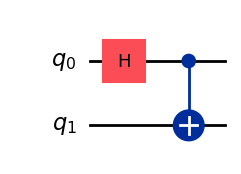

In [40]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1
qc.cx(0, 1)

qc.draw("mpl")

The `quantum_info` module contains tools to build observables, notably the `SparsePauliOp` class (whose internal representation is NOT sparse). This is the class currently used to communicate with the `Estimator` class (more details later). See docs [here](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.SparsePauliOp).

 If you are interested in a truly sparse object, check out the `SparseObservable` [docs](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.SparseObservable).

In [41]:
from qiskit.quantum_info import SparsePauliOp

# Set up six different observables.
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

for obs in observables:
    print(obs)

SparsePauliOp(['IZ'],
              coeffs=[1.+0.j])
SparsePauliOp(['IX'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZI'],
              coeffs=[1.+0.j])
SparsePauliOp(['XI'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])
SparsePauliOp(['XX'],
              coeffs=[1.+0.j])


The `quantum_info` module also allows to build operators from circuits:

In [42]:
from qiskit.quantum_info import Operator

op = Operator(qc)
op

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [43]:
matrix = op.to_matrix()
op.is_unitary()

True

For more info on the `quantum_info` module check out the [docs](https://docs.quantum.ibm.com/api/qiskit/quantum_info).

The circuit construction example above is quite simple, it doesn't add measurements or parametrized gates, but I trust you to look these details up in the documentation. A more complete example would be a circuit like:

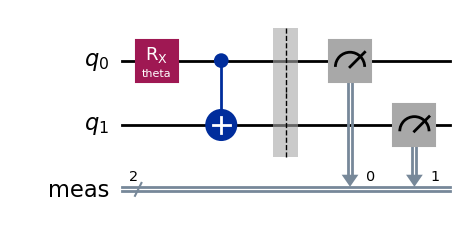

In [44]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

theta = Parameter("theta")
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a parametrized X gate to qubit 0
qc.rx(theta, 0)
 
# Perform a controlled-X gate on qubit 1
qc.cx(0, 1)

# Measure all qubits
qc.measure_all()

qc.draw("mpl")

#### Using circuit.library

Instead of building circuits from scratch, one can take advantage of tools like the [circuit library](https://docs.quantum.ibm.com/api/qiskit/circuit_library).

<img src="images/circuit_library.png" alt="Drawing" style="width: 800px;"/>

For example, we can easily build a hardware-native variational ansatz following a specific entanglement pattern:

<img src="images/efficient_su2.png" alt="Drawing" style="width: 500px;"/>

Num. qubits: 27
Operations: OrderedDict([('cx', 168), ('ry', 108), ('rz', 108)])
2q depth: 46


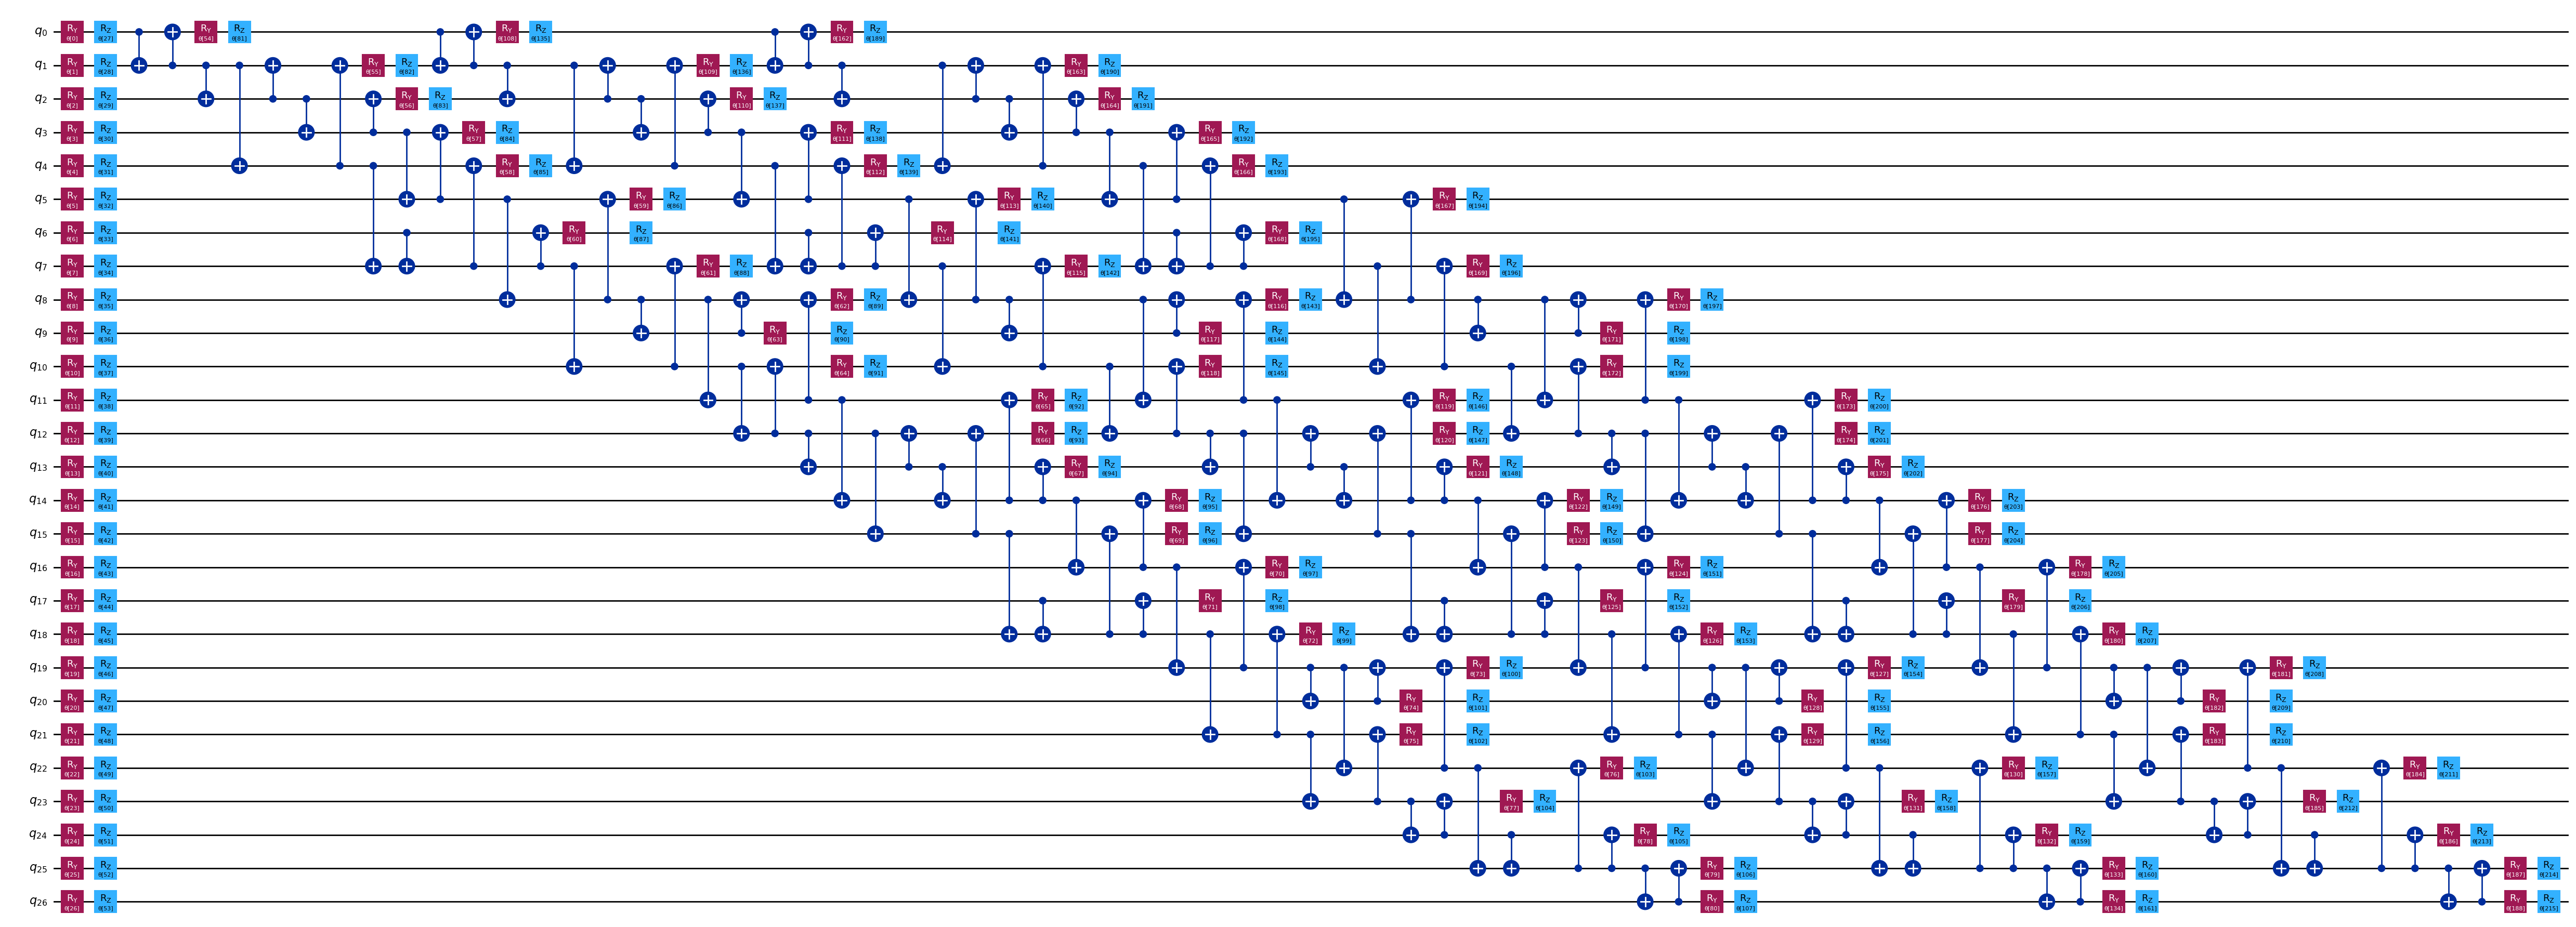

In [45]:
from qiskit.circuit.library import efficient_su2

entanglement = [tuple(edge) for edge in coupling.get_edges()]
qc = efficient_su2(coupling.size(), entanglement=entanglement)

print("Num. qubits:", qc.num_qubits)
print("Operations:", qc.count_ops())
print("2q depth:", qc.depth(lambda op: len(op.qubits) == 2))

qc.draw("mpl", fold=-1)

Or, for example, we can easily build a circuit that represents the evolution of the "Kicked" Ising model from https://www.nature.com/articles/s41586-023-06096-3 using the `PauliEvolution` gate.

<img src="images/kicked_ising.png" alt="Drawing" style="width: 500px;"/>

Num. qubits: 57
Operations: OrderedDict([('rx', 285), ('rzz', 280)])
2q depth: 58


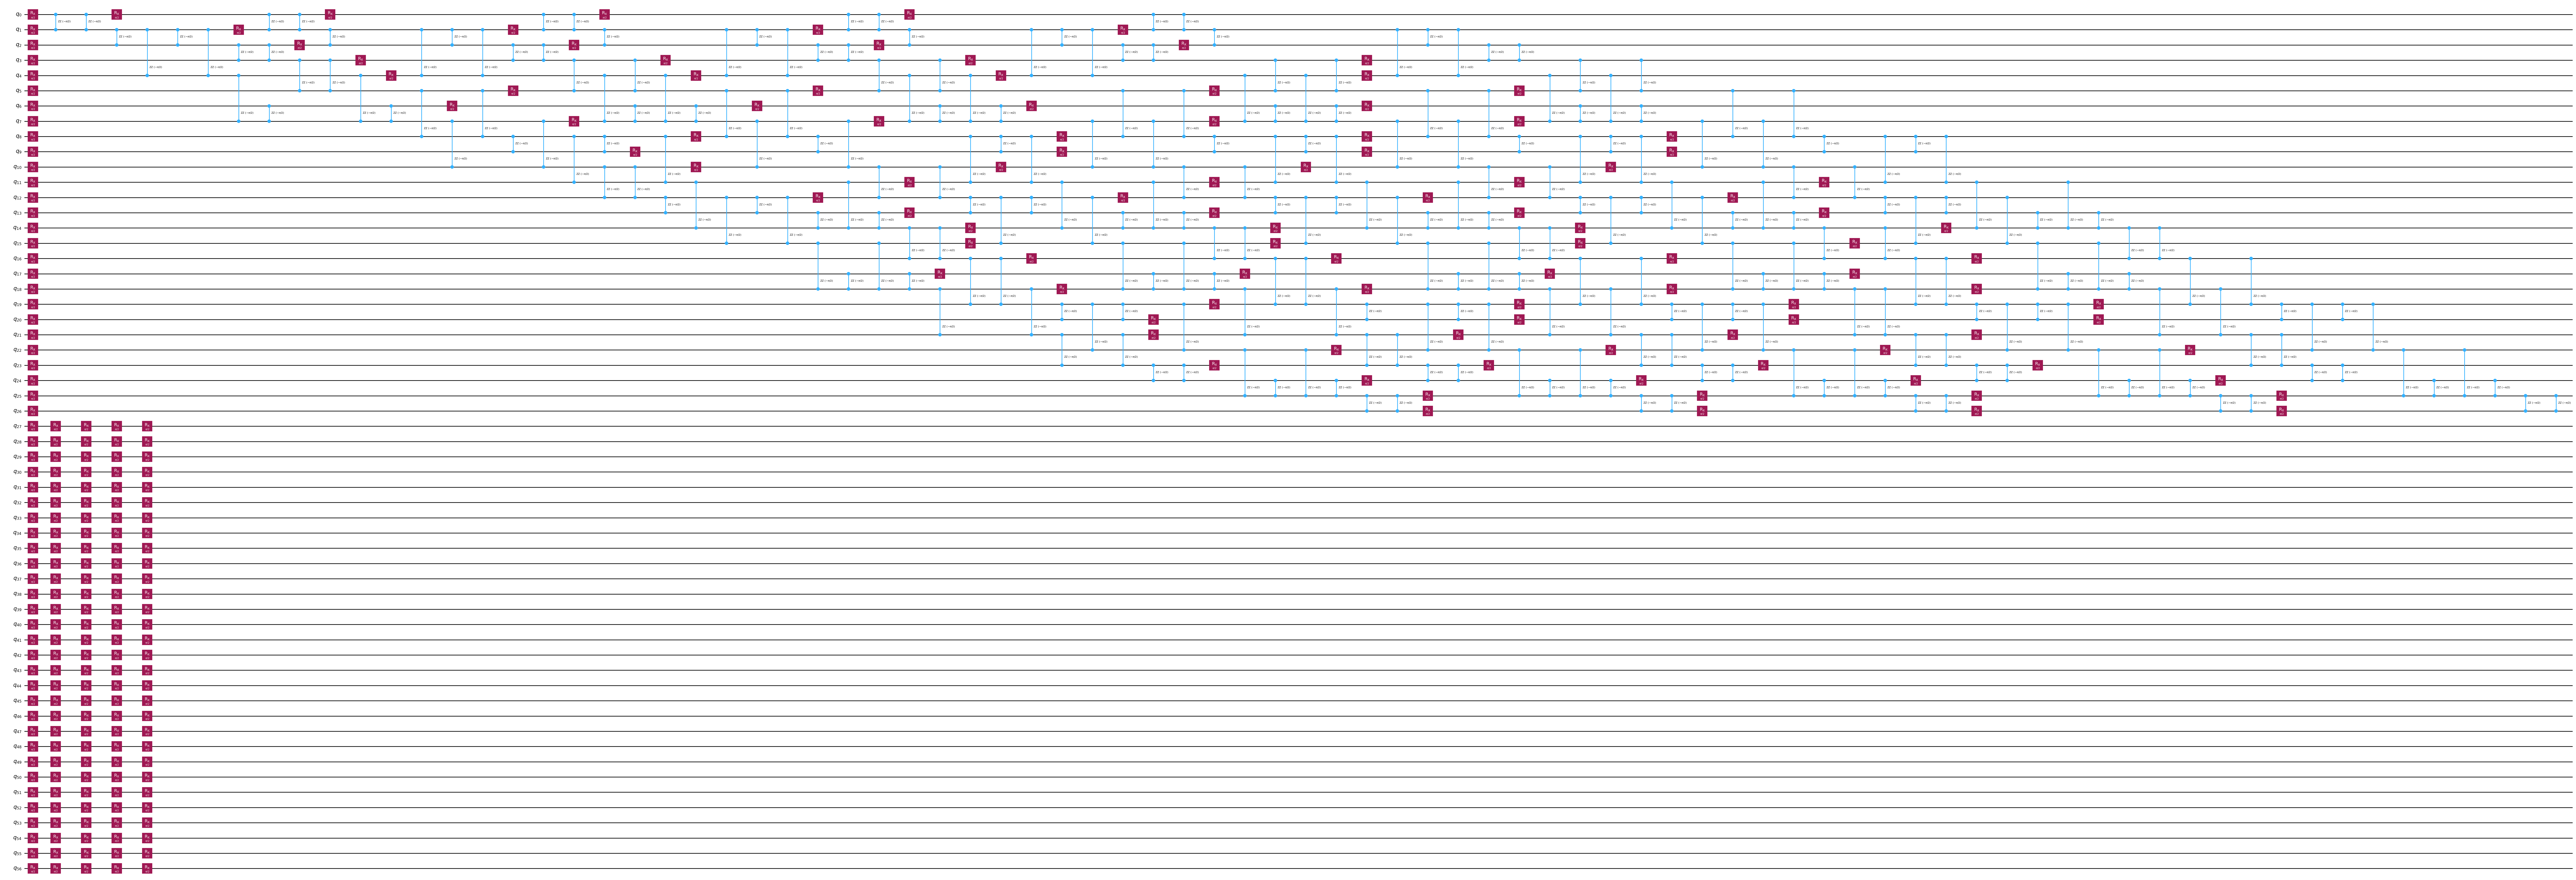

In [46]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
import numpy as np

entanglement = [tuple(edge) for edge in coupling.get_edges()]
num_qubits = backend.num_qubits
steps = 5
# Ising coupling
J = np.pi / 4   
# Transverse field strength      
h = np.pi / 4         

Hx = SparsePauliOp.from_sparse_list([("X", [i], h) for i in range(num_qubits)], num_qubits=num_qubits)
Hzz = SparsePauliOp.from_sparse_list([("ZZ", [i, j], -J) for i, j in entanglement], num_qubits=num_qubits)

x_evo = PauliEvolutionGate(Hx)
zz_evo = PauliEvolutionGate(Hzz)
kicked = QuantumCircuit(num_qubits)
for _ in range(steps): # we use steps=5
    kicked.append(x_evo, kicked.qubits)
    kicked.append(zz_evo, kicked.qubits)

kicked = kicked.decompose()
print("Num. qubits:", kicked.num_qubits)
print("Operations:", kicked.count_ops())
print("2q depth:", kicked.depth(lambda op: len(op.qubits) == 2))
kicked.draw('mpl', fold=-1)


### Step 2: Optimize circuit for Hardware

This step of the pattern is what we commonly refer to as the **transpilation step**. Some SDKS also refer to it as "circuit compilation".

<img src="images/why_transpile_1.png" alt="Drawing" style="width: 800px;"/>
<img src="images/why_transpile_2.png" alt="Drawing" style="width: 800px;"/>

According to the benchpress open-source benchmarking suite: https://github.com/Qiskit/benchpress, the Qiskit transpiler currently provides the best speed and 2q gate optimization rates from all the tested SDKs. The benchmarking results are produced using the default transpilation settings. Benchmarks are never perfect, so feel free to challenge the settings and play around with custom tools. The TL;DR is that, in most cases, defaults work.

**Example: Qiskit 2.0 vs Pytket 2.1 using Benchpress.** 

Qiskit is 100x+faster (wall-clock time), and has geometric means of:
-  54x faster
- 30% fewer 2Q gates
- 3% reduced depth

The Qiskit transpilation pipeline is defined by **transpilation passes** that perform concrete transformations. The control flow logic is handled by **pass managers**, that are structured in **stages** in the default pipeline. We call the default pipeline the **"preset pass manager"**. The stages are:

<img src="images/pm_stages.png" alt="Drawing" style="width: 800px;"/>

Using the preset pass manager, we don't necessarily see the stages in action, but we can play with the **optimization level**:

In [47]:
# Original circuit

print("Num. qubits:", kicked.num_qubits)
print("Operations:", kicked.count_ops())
print("2q depth:", kicked.depth(lambda op: len(op.qubits) == 2))

Num. qubits: 57
Operations: OrderedDict([('rx', 285), ('rzz', 280)])
2q depth: 58


In [48]:
# Using .decompose()

decomp_kicked = kicked.decompose()

print("Num. qubits:", decomp_kicked.num_qubits)
print("Operations:", decomp_kicked.count_ops())
print("2q depth:", decomp_kicked.depth(lambda op: len(op.qubits) == 2))

Num. qubits: 57
Operations: OrderedDict([('cx', 560), ('r', 285), ('rz', 280)])
2q depth: 116


**Limitations of `decompose`**

- What if our device doesn't support 'rzz' gates?
- What if the connectivity of our device doesn't match the circuit's?

Beyond visualizations, `decompose()` doesn't fully do the trick, and one should use the preset pass manager instead.

In [49]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeTorino
backend = FakeTorino()

In [50]:
# Using preset pass manager with opt. level 1

pm = generate_preset_pass_manager(
	backend=backend, 
	optimization_level=1
	)
transpiled_kicked = pm.run(kicked)
print("Num. qubits:", transpiled_kicked.num_qubits)
print("Operations:", transpiled_kicked.count_ops())
print("2q depth:", transpiled_kicked.depth(lambda op: len(op.qubits) == 2))
# transpiled_kicked.draw(fold=-1)

Num. qubits: 133
Operations: OrderedDict([('rz', 764), ('cz', 440), ('sx', 421), ('x', 60)])
2q depth: 104


In [51]:
# Using preset pass manager with opt. level 2

pm = generate_preset_pass_manager(
	backend=backend, 
	optimization_level=2
	)
transpiled_kicked = pm.run(kicked)
print("Num. qubits:", transpiled_kicked.num_qubits)
print("Operations:", transpiled_kicked.count_ops())
print("2q depth:", transpiled_kicked.depth(lambda op: len(op.qubits) == 2))
# transpiled_kicked.draw(fold=-1)

Num. qubits: 133
Operations: OrderedDict([('rz', 247), ('x', 172), ('cz', 160), ('sx', 133)])
2q depth: 34


In [52]:
# Using preset pass manager with opt. level 3

pm = generate_preset_pass_manager(
	backend=backend, 
	optimization_level=3
	)
transpiled_kicked = pm.run(kicked)
print("Num. qubits:", transpiled_kicked.num_qubits)
print("Operations:", transpiled_kicked.count_ops())
print("2q depth:", transpiled_kicked.depth(lambda op: len(op.qubits) == 2))
# transpiled_kicked.draw(fold=-1)

Num. qubits: 133
Operations: OrderedDict([('rz', 247), ('x', 172), ('cz', 160), ('sx', 133)])
2q depth: 34


The layout step also affects observables, because the physical qubits and virtual qubits no longer match. For example, let's imagine we have a magnetization observable built with the original Kicked Ising circuit:

In [53]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

num_qubits = kicked.num_qubits
spin_up_indices = list(range(0, num_qubits, 2))
spin_down_indices = list(range(1, num_qubits, 2))
coeffs = []
paulis = []

for i in spin_down_indices:
    z_string = ['I'] * num_qubits
    z_string[i] = 'Z'
    paulis.append(''.join(z_string))
    coeffs.append(+1)

for i in spin_up_indices:
    z_string = ['I'] * num_qubits
    z_string[i] = 'Z'
    paulis.append(''.join(z_string))
    coeffs.append(-1)

m_op = SparsePauliOp(paulis, np.array(coeffs) * 0.5)
print("Observable: ", m_op)


Observable:  SparsePauliOp(['IZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIII

If we apply a layout transformation, we need to make sure the positions of the paulis follow:

In [54]:

mapped_observable = m_op.apply_layout(transpiled_kicked.layout)

print(mapped_observable)


SparsePauliOp(['IIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIII

**Playing around with Synthesis Plugins**

The Qiskit transpiler is highly pluggable and allows to use a large array of synthesis algorithms beyond the default pipeline. To do so, you can make use of the plugin structure: https://docs.quantum.ibm.com/api/qiskit/transpiler_synthesis_plugins.


For example, to transpile the Kicked Ising model defined earlier:

In [55]:
from qiskit.transpiler.passes.synthesis.high_level_synthesis import HLSConfig

hls = HLSConfig(PauliEvolution=[("default", {"preserve_order": False})])

pm = generate_preset_pass_manager(
	backend=backend, 
	optimization_level=2,
    hls_config=hls
	)

transpiled_kicked = pm.run(kicked)
print("Num. qubits:", transpiled_kicked.num_qubits)
print("Operations:", transpiled_kicked.count_ops())
print("2q depth:", transpiled_kicked.depth(lambda op: len(op.qubits) == 2))

Num. qubits: 133
Operations: OrderedDict([('rz', 247), ('x', 172), ('cz', 160), ('sx', 133)])
2q depth: 34


### Step 3: Execute (or simulate)

Once the optimization for hardware is complete, we can run the problem, either on real or simulated devices (with limitations, of course). The tools that Qiskit provides for this means are the [Qiskit Primitives](https://docs.quantum.ibm.com/guides/primitives).

<img src="images/target_model_2.png" alt="Drawing" style="width: 800px;"/>

There are 2 Qiskit Primitives:

* **Sampler**: Samples from quantum states 
* **Estimator**: Computes expectation values of observables applied to quantum states

There are several implementations exposed throughout the Qiskit stack, but for simplicity we will focus in those in `qiskit-ibm-runtime`, that allow for both local simulation and execution on real devices. 

7


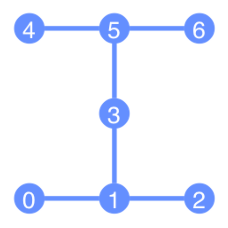

In [56]:
# Small-scale FAKE backend

from qiskit_ibm_runtime.fake_provider import FakeLagosV2

backend = FakeLagosV2()
print(backend.num_qubits)
plot_gate_map(backend)

In [57]:
# Utility-scale REAL backend

# from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService(channel="ibm_quantum_platform")
# backend = service.backend("ibm_sherbrooke")
# print(backend.num_qubits)
# plot_gate_map(backend)

### Estimator Example

Let's imagine we want to compute the expectation value of a QAOA circuit for a specific set of parameter values.

In [58]:
from qiskit.circuit.library import qaoa_ansatz
from qiskit.quantum_info import SparsePauliOp

entanglement = [tuple(edge) for edge in backend.coupling_map.get_edges()]
observable = SparsePauliOp.from_sparse_list(
    [("ZZ", [i, j], 0.5) for i, j in entanglement],
    num_qubits=backend.num_qubits,
)
circuit = qaoa_ansatz(observable, reps=2)

# the circuit is parametrized, so we will define the parameter values for execution
param_values = [0.1, 0.2, 0.3, 0.4]

Circuit ops (ISA): OrderedDict([('rz', 76), ('sx', 35), ('cx', 32)])
Observable: SparsePauliOp(['IIIIIZZ', 'IIIIIZZ', 'IIIIZZI', 'IIIZIZI', 'IIIIZZI', 'IIIZIZI', 'IZIZIII', 'IZZIIII', 'IZIZIII', 'IZZIIII', 'ZZIIIII', 'ZZIIIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


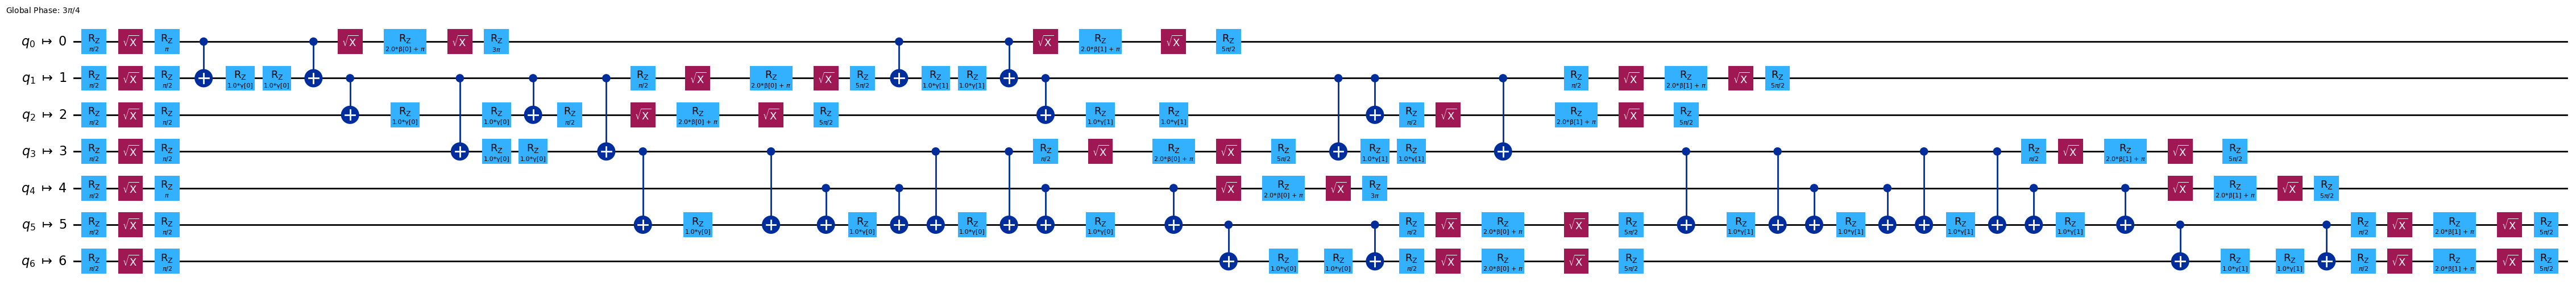

In [59]:
from qiskit.transpiler import generate_preset_pass_manager

# transpile to the selected backend's "ISA" and layout

pm = generate_preset_pass_manager(optimization_level=2, backend=backend)

isa_circuit = pm.run(circuit)
# in this case, the observable is already HW-native, but for good measure
isa_observable = observable.apply_layout(isa_circuit.layout)

print("Circuit ops (ISA):", isa_circuit.count_ops())
print("Observable:", isa_observable)
isa_circuit.draw('mpl', fold=-1)

In [60]:
from qiskit_ibm_runtime import EstimatorV2
 
# Depending on the provided backend, the estimator will run 
# on the real device or on a local simulator
estimator = EstimatorV2(mode=backend)
print("Will run estimator on following backend: ", estimator.backend())

Will run estimator on following backend:  <qiskit_ibm_runtime.fake_provider.backends.lagos.fake_lagos.FakeLagosV2 object at 0x37c964c10>


The `.run` inputs follow the "PUB" format (*Primitive Input Bloc*). Each pub corresponds to a single circuit, which is grouped to an (array of) observable(s) and, if the circuit is parametrized, an (array of) parameter value set(s): `(circuit, observables, param_values)`.

Estimators accept single and multiple input pubs, allowing for different input combinations and optimized **broadcasting**:

- 1 pub, 1 observable, 1 param set: `estimator.run([(circuit_1, observable_1, param_values_1)])`

- 2 pubs, each with 1 obs, 1 param set: `estimator.run([(circuit_1, observable_1, param_values_1), (circuit_2, observable_2, param_values_2)])`

- 1 pub, 3 observables, 2 param set: `estimator.run([(circuit_1, [observable_1, observable_2, observable_3], [param_values_1, param_values_2])])`

In [61]:
job = estimator.run([(isa_circuit, isa_observable, param_values)])
print("Job ID:", job.job_id())
print("Job Status:", job.status())

Job ID: 4b3e888e-f052-4675-a125-4bb7fa0b602a
Job Status: JobStatus.RUNNING


Try the following input combinations and see how the outputs change and broadcasting is applied:

In [62]:
# param_values_2 = [0.5, 0.6, 0.7, 0.8]
# job = estimator.run([(isa_circuit, [isa_observable, isa_observable], [param_values, param_values_2])])

In [63]:
# job = estimator.run([(isa_circuit, [isa_observable, isa_observable], [param_values])])

In [64]:
# param_values_2 = [0.5, 0.6, 0.7, 0.8]
# param_values_3 = [0.6, 0.2, 0.1, 0.9]
# job = estimator.run([(isa_circuit, isa_observable, param_values), (isa_circuit, isa_observable, param_values_2), (isa_circuit, isa_observable, param_values_3)])

The job submission is asynchronous (non-blocking), but calling `job.result()` is going to block the notebook until the job has been completed. The output of the `Estimator` is a `PrimitiveResult` object:

In [65]:
result = job.result()
print(result)

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.float64(0.09299604197177601)), metadata={'target_precision': 0.015625, 'shots': 4096, 'circuit_metadata': {}})], metadata={'version': 2})


Each element in the `PrimitiveResult` is the result of one of the input PUBs. In this case, we only submitted 1 pub:

In [66]:
len(result)

1

In [67]:
result[0]

PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.float64(0.09299604197177601)), metadata={'target_precision': 0.015625, 'shots': 4096, 'circuit_metadata': {}})

Each `PubResult` contains `data` and `metadata` attributes:

In [68]:
print("Metadata: ", result[0].metadata)

Metadata:  {'target_precision': 0.015625, 'shots': 4096, 'circuit_metadata': {}}


The expectation values are contained in the `evs` field of `data`:

In [69]:
print("Expectation values: ", result[0].data.evs)

Expectation values:  0.68896484375


**Setting Precision**

The target precision is calculated as `1/sqrt(num_shots)`. The default value is `1/sqrt(4096)`.

In [70]:
shots = 10000
new_precision = 1/np.sqrt(shots)
print(new_precision)

0.01


In [71]:
result = estimator.run([(isa_circuit, isa_observable, param_values)], precision=new_precision).result()
print("Expectation values: ", result[0].data.evs)
print("Metadata: ", result[0].metadata)

Expectation values:  0.6396
Metadata:  {'target_precision': np.float64(0.01), 'shots': 10000, 'circuit_metadata': {}}


**Setting Options**
The Qiskit Runtime Estimator exposes Error mitigation methods and advanced execution options. See the following guides to get more information:

- [Options Overview](https://docs.quantum.ibm.com/guides/runtime-options-overview)
- [Setting Options](https://docs.quantum.ibm.com/guides/specify-runtime-options)
- [Error mitigation and suppression techniques](https://docs.quantum.ibm.com/guides/error-mitigation-and-suppression-techniques)
- [Execution modes](https://docs.quantum.ibm.com/guides/execution-modes)


### Sampler Example

The Sampler follows the same design principles as the Estimator, but the abstraction is simpler, as it only involves circuits.

In [72]:
import numpy as np
from qiskit.circuit.library import efficient_su2
 
circuit = efficient_su2(backend.num_qubits, entanglement="linear")
circuit.measure_all()
# The circuit is parametrized, so we will define the parameter values for execution
param_values = np.random.rand(circuit.num_parameters)

Circuit ops (ISA): OrderedDict([('rz', 84), ('sx', 56), ('cx', 36), ('measure', 7), ('barrier', 1)])


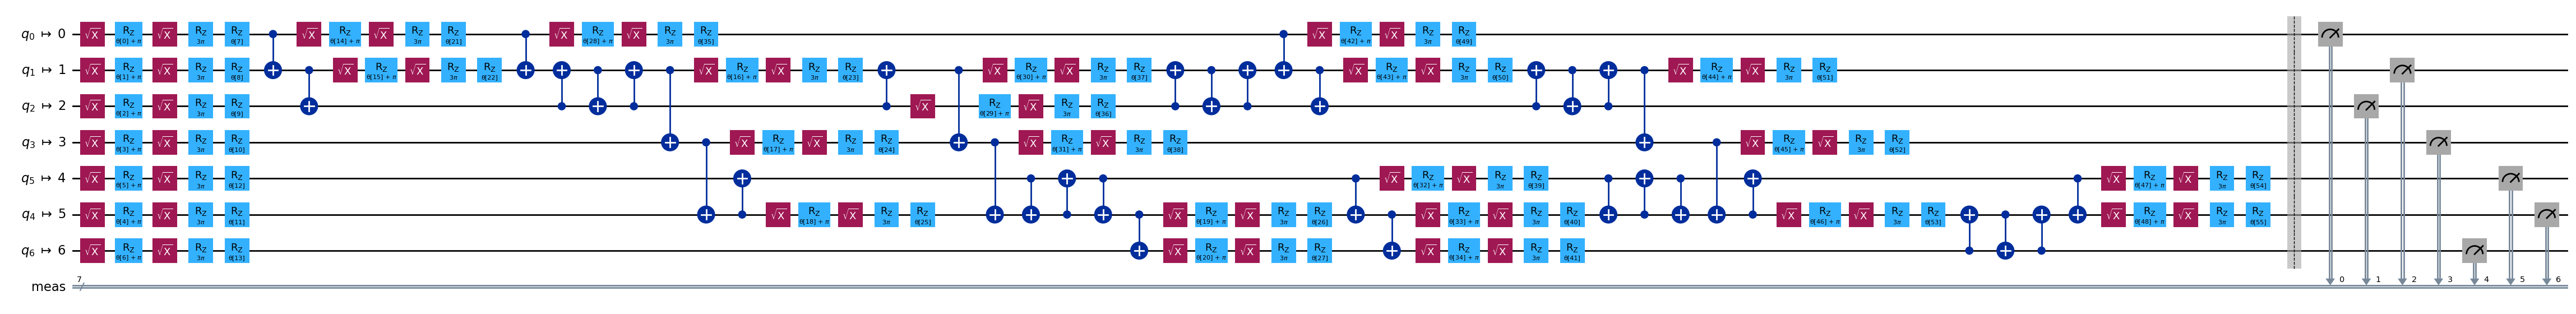

In [73]:
from qiskit.transpiler import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)
print("Circuit ops (ISA):", isa_circuit.count_ops())
isa_circuit.draw('mpl', fold=-1)

In [74]:
from qiskit_ibm_runtime import SamplerV2
 
# Depending on the provided backend, the estimator will run 
# on the real device or on a local simulator
sampler = SamplerV2(mode=backend)
print("Will run sampler on following backend: ", sampler.backend())

Will run sampler on following backend:  <qiskit_ibm_runtime.fake_provider.backends.lagos.fake_lagos.FakeLagosV2 object at 0x37c964c10>


The `.run` inputs also follow the "PUB" format (*Primitive Input Bloc*). Each pub corresponds to a single circuit, and, iff the circuit is parametrized, an (array of) parameter value set(s): `(circuit, param_values)`. There are no observables in this case.

Samplers accept single and multiple input pubs, allowing for different input combinations and optimized **broadcasting**:

- 1 pub, 1 param set: `sampler.run([(circuit_1, param_values_1)])`

- 1 pub, no parameters: `sampler.run([circuit_1])`

- 2 pubs, each with 1 param set: `sampler.run([(circuit_1, param_values_1), (circuit_2, param_values_2)])`

- 1 pub, 2 param set: `sampler.run([(circuit_1, [param_values_1, param_values_2])])`

In [75]:
job = sampler.run([(isa_circuit, param_values)])
print("Job ID:", job.job_id())
print("Job Status:", job.status())

Job ID: 885c487b-5838-4d15-8858-231abd2b7c88
Job Status: JobStatus.RUNNING


The job submission is asynchronous (non-blocking), but calling `job.result()` is going to block the notebook until the job has been completed. The output of the `Sampler` is a `PrimitiveResult` object:

In [76]:
result = job.result()
result

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=7>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})

Each element in the `PrimitiveResult` is the result of one of the input PUBs:

In [77]:
print(len(result))

# Get results for the first (and only) PUB
pub_result = result[0]

1


The `SamplerPubResult` class contains, once again, a `data` and `metadata` attribute. The `metadata` attribute looks very similar to the Estimator:

In [78]:
pub_result.metadata

{'shots': 1024, 'circuit_metadata': {}}

The `data` attribute allows to retrieve results in different formats: **bitstrings** or **counts**, with the following access strategies:

1. Access results associated to each classical register by name:

In [79]:
# Get classical register name
print(isa_circuit.cregs)

# Access data from classical register by name
print(
    f"Counts for the 'meas' output register (len: {len(pub_result.data.meas.get_counts())}): {pub_result.data.meas.get_counts()}"
)

print(
    f"Bitstrings for the 'meas' output register (len: {len(pub_result.data.meas.get_bitstrings())}): {pub_result.data.meas.get_bitstrings()}"
)

[ClassicalRegister(7, 'meas')]
Counts for the 'meas' output register (len: 126): {'1100010': 17, '1000010': 18, '0010001': 5, '0110110': 15, '1100111': 13, '0000001': 14, '0110000': 7, '0000010': 21, '1111010': 11, '1000110': 9, '0100011': 15, '1011010': 15, '0010000': 9, '0111111': 11, '0000111': 13, '0110111': 9, '0010110': 13, '1111000': 4, '1010100': 7, '1110011': 6, '0111101': 6, '1001110': 9, '1010111': 15, '0001110': 14, '0110011': 7, '0100001': 4, '0011000': 10, '1010110': 16, '1110111': 7, '1111001': 2, '1100000': 13, '0010101': 7, '0000100': 9, '0000101': 2, '1101000': 7, '0101100': 7, '1110101': 3, '0110100': 6, '0111110': 14, '1000011': 16, '0101110': 11, '1010010': 18, '1011001': 3, '1000001': 5, '0101010': 14, '0110010': 12, '0101000': 13, '0110001': 3, '1101110': 4, '0001010': 11, '0100010': 15, '1010011': 16, '0111000': 6, '1100110': 16, '0011001': 2, '0111001': 5, '0100100': 5, '0111010': 19, '0011010': 10, '0000110': 18, '1110100': 8, '1110010': 9, '1100100': 8, '1111

2. Iterate over registers and get results without knowing name in advance:

In [80]:
# See classical register keys  in data
for creg, output in result[0].data.items():
    print ("Register name:", creg, ". Counts:", output.get_counts())
    print ("Register name:", creg, ". Bitstrings:", output.get_bitstrings())

Register name: meas . Counts: {'1100010': 17, '1000010': 18, '0010001': 5, '0110110': 15, '1100111': 13, '0000001': 14, '0110000': 7, '0000010': 21, '1111010': 11, '1000110': 9, '0100011': 15, '1011010': 15, '0010000': 9, '0111111': 11, '0000111': 13, '0110111': 9, '0010110': 13, '1111000': 4, '1010100': 7, '1110011': 6, '0111101': 6, '1001110': 9, '1010111': 15, '0001110': 14, '0110011': 7, '0100001': 4, '0011000': 10, '1010110': 16, '1110111': 7, '1111001': 2, '1100000': 13, '0010101': 7, '0000100': 9, '0000101': 2, '1101000': 7, '0101100': 7, '1110101': 3, '0110100': 6, '0111110': 14, '1000011': 16, '0101110': 11, '1010010': 18, '1011001': 3, '1000001': 5, '0101010': 14, '0110010': 12, '0101000': 13, '0110001': 3, '1101110': 4, '0001010': 11, '0100010': 15, '1010011': 16, '0111000': 6, '1100110': 16, '0011001': 2, '0111001': 5, '0100100': 5, '0111010': 19, '0011010': 10, '0000110': 18, '1110100': 8, '1110010': 9, '1100100': 8, '1111110': 11, '0100110': 13, '0010111': 10, '0100111': 

### Step 4: Post-Process

No specific tools, but I will use this section to show how to save Qiskit objects using QPY:

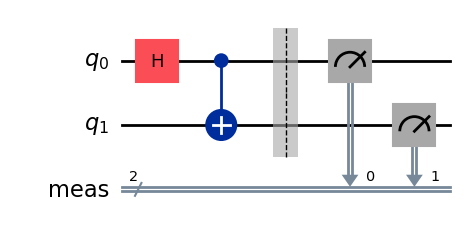

In [81]:
from qiskit.circuit import QuantumCircuit
from qiskit import qpy
 
qc = QuantumCircuit(2, name='Bell', metadata={'test': True})
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw('mpl')

In [82]:
 
with open('bell.qpy', 'wb') as fd:
    qpy.dump(qc, fd)
 
with open('bell.qpy', 'rb') as fd:
    new_qc = qpy.load(fd)[0]

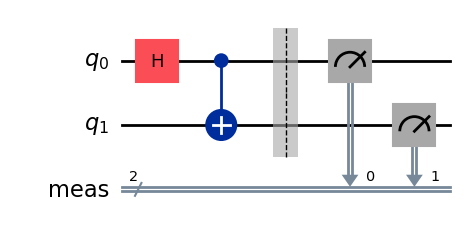

In [83]:
new_qc.draw('mpl')

### The End

You made it through the whole notebook! You are now a very well versed Qiskitter. Congrats :)

<img src="images/qiskit_stack_2.png" alt="Drawing" style="width: 800px;"/>